# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK3"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "PLA0")
RandomForestResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "RFA0")
AnalyzedDataUNREALDUREAL = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedDataUNREALDUREAL["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedDataUNREALDUREAL["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable

,DUREAL,UNREAL
0,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
# TimeTable.index = range(10,30,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
0,132.66,131.86,584.28,1127.61


# Error Vec

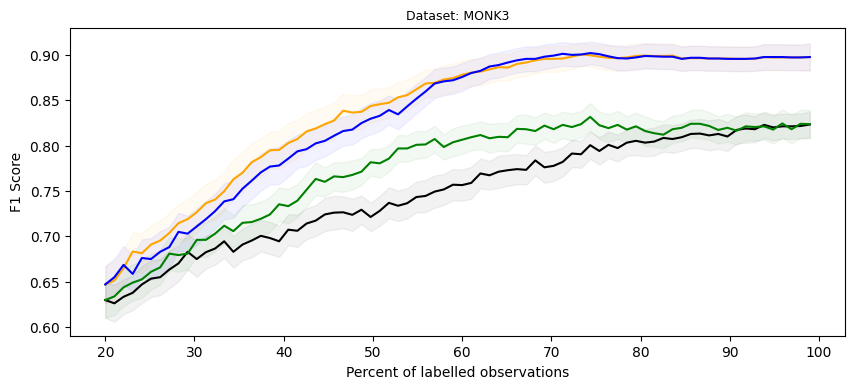

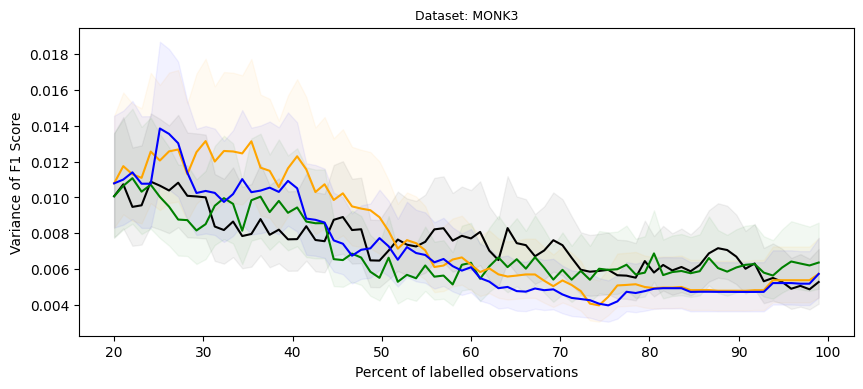

In [5]:
### Set Up ###
PlotSubtitle = f"Dataset: {DataType}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL": "orange",
    "UNREAL": "blue"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL": "solid",
    "UNREAL": "solid"
}

LegendMapping = {
    "DUREAL0": "DUREAL (ε = 0.xxx)",
    "UNREAL0": "UNREAL (ε = 0.xxx)",
}

# markerstyles = {
#     "PassiveLearning": "^",
#     "RandomForest": "^",
#     "DUREAL": "^",
#     "UNREAL": "^"
# }

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 PassiveLearning = PassiveLearningRF["Error"],
                 RandomForest = RandomForestResults["Error"],
                 DUREAL = AnalyzedDataUNREALDUREAL["Error_DUREAL"],
                 UNREAL = AnalyzedDataUNREALDUREAL["Error_UNREAL"],
                 Colors = colors,
                LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                #  Markerstyles = markerstyles,
                # xlim = [20,25],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 VarInput = True,
                #  FigSize = (10,5),
                 CriticalValue = 1.96)

# Number of All Trees

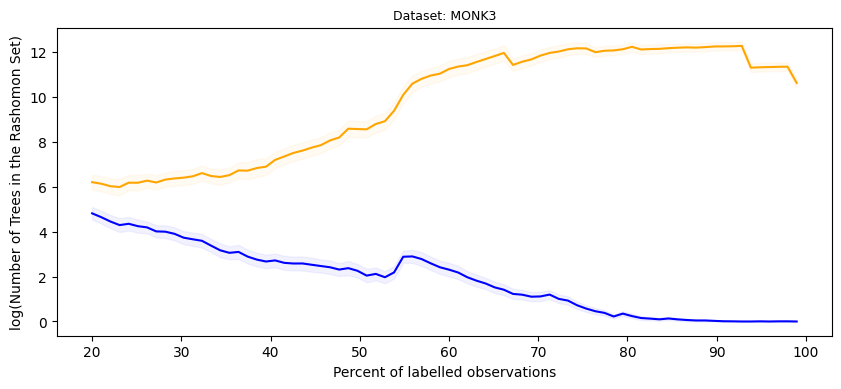

In [6]:
### Line Styles ###
# linestyles = {"DUREAL005" : "solid",
# "DUREAL010" : "solid",
# "DUREAL015" : "solid",
# "DUREAL020" : "solid",
# "DUREAL025" : "solid"
# }

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL = np.log(AnalyzedDataUNREALDUREAL["TreeCounts_ALL_UNREAL"]),
                 UNREAL = np.log(AnalyzedDataUNREALDUREAL["TreeCounts_UNIQUE_UNREAL"]),
                Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Trees in the Rashomon Set)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 VarInput = False,
                # FigSize = (5,5),
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [7]:
WRSTResults = WilcoxonRankSignedTest({
    "PassiveLearning" :PassiveLearningRF["Error"],
    "RandomForest" : RandomForestResults["Error"],
    "UNREAL" : AnalyzedDataUNREALDUREAL["Error_UNREAL"],
    "DUREAL" : AnalyzedDataUNREALDUREAL["Error_DUREAL"]},
    5)

WRSTResults_LatexTable = WRSTResults.to_latex()
print(WRSTResults_LatexTable)

\begin{tabular}{lllll}
\toprule
 & PassiveLearning & RandomForest & UNREAL & DUREAL \\
\midrule
PassiveLearning & 1.0 &  &  &  \\
RandomForest & 0.0 & 1.0 &  &  \\
UNREAL & 0.0 & 0.0 & 1.0 &  \\
DUREAL & 0.0 & 0.0 & 2e-05 & 1.0 \\
\bottomrule
\end{tabular}



# Selection History

In [8]:
# SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForestResults["SelectionHistory_RF"], DataType = DataType)
# SelectionHistoryRank_UNREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_UNREAL"], DataType = DataType)
# SelectionHistoryRank_DUREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_DUREAL"], DataType = DataType)
# SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_UNREAL.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_DUREAL.sort_values(by = "AverageRank").head()